In [9]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

connct = psycopg2.connect('dbname=WhiskyAdvocate user= postgres password = [redacted] host = 127.0.0.1 port=5432')

In [10]:
#Query the database to recover the needed data for unsupervised learning operations

ds_query = ''' SELECT whiskey_stats.price_usd, whiskey_stats.percent_abv, features_rev.*
                FROM whiskey_stats
                INNER JOIN features_rev
                ON whiskey_stats.whiskey_id = features_rev.whiskey_id;'''

ml_df_full = pd.read_sql(ds_query, connct)

ml_df_full.head()

,price_usd,percent_abv,fruity_words,wood_words,spicy_words,sweet_words,maillard_words,smoke_words,sherry,white,hot,bitter,complex,subtle,floral,whiskey_id
0,55.0,45.0,2,1,2,0,0,0,0,0,0,0,0,0,1,0
1,40.0,40.0,2,0,0,1,2,0,0,0,0,0,0,0,0,1
2,40.0,50.0,1,2,1,1,1,0,0,0,0,0,0,0,0,2
3,35.0,45.2,1,0,0,3,0,0,0,0,0,0,0,0,0,3
4,65.0,45.0,2,0,0,3,1,0,0,0,0,0,0,0,0,4


In [11]:
#close the connection
connct.close()

In [12]:
#git rid of whiskey_id

ml_df = ml_df_full.drop(['whiskey_id'], axis = 1)

#check for missing values
ml_df.isnull().sum()

price_usd         0
percent_abv       0
fruity_words      0
wood_words        0
spicy_words       0
sweet_words       0
maillard_words    0
smoke_words       0
sherry            0
white             0
hot               0
bitter            0
complex           0
subtle            0
floral            0
dtype: int64

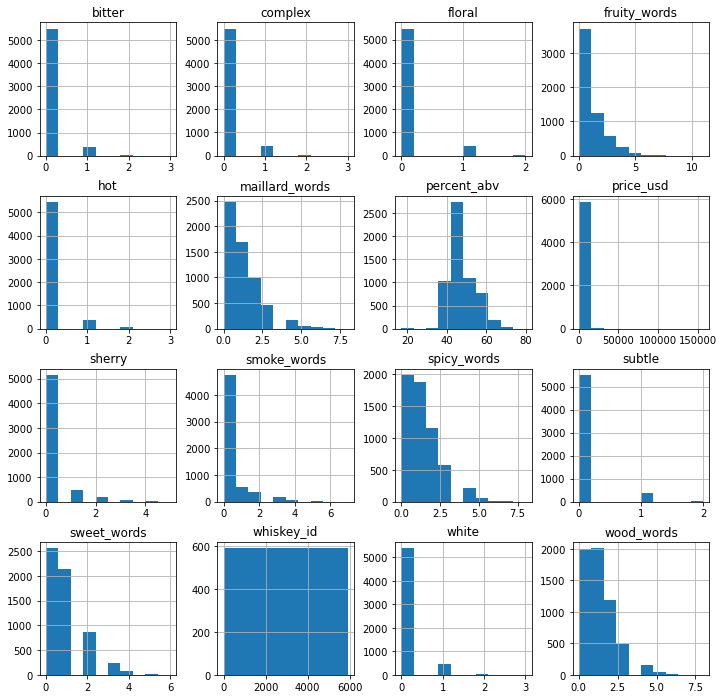

In [13]:
#A few visualizations of the new features

ml_df_full.hist(figsize = (12, 12))

plt.show()

# Visualize separation in data using t-SNE

In [14]:
#import libraries for tSNE and min/max scaler to make sure dimensions have equal 
import sklearn
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [15]:
#scale the data using minmaxscaler

scaler = MinMaxScaler().fit(ml_df)

ml_scale = scaler.transform(ml_df)

ml_scale


array([[3.02562224e-04, 4.45151033e-01, 1.81818182e-01, ...,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-01],
       [2.07016259e-04, 3.65659777e-01, 1.81818182e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.07016259e-04, 5.24642289e-01, 9.09090909e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.70713569e-04, 4.45151033e-01, 9.09090909e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.25502811e-04, 5.64387917e-01, 9.09090909e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.07016259e-04, 4.13354531e-01, 1.81818182e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [16]:
# TSNE the scaled data using default hyperparameters and try to visualize it

tsne1 = TSNE(random_state=42)

ws_tsne1 = tsne1.fit_transform(ml_scale)

ws_tsne1

array([[-58.486897  , -48.785282  ],
       [ 24.76481   ,  -6.647824  ],
       [ 50.58661   ,   5.0842924 ],
       ...,
       [ 28.987354  ,   6.183426  ],
       [  0.46796805, -52.61219   ],
       [-10.815228  , -64.918495  ]], dtype=float32)

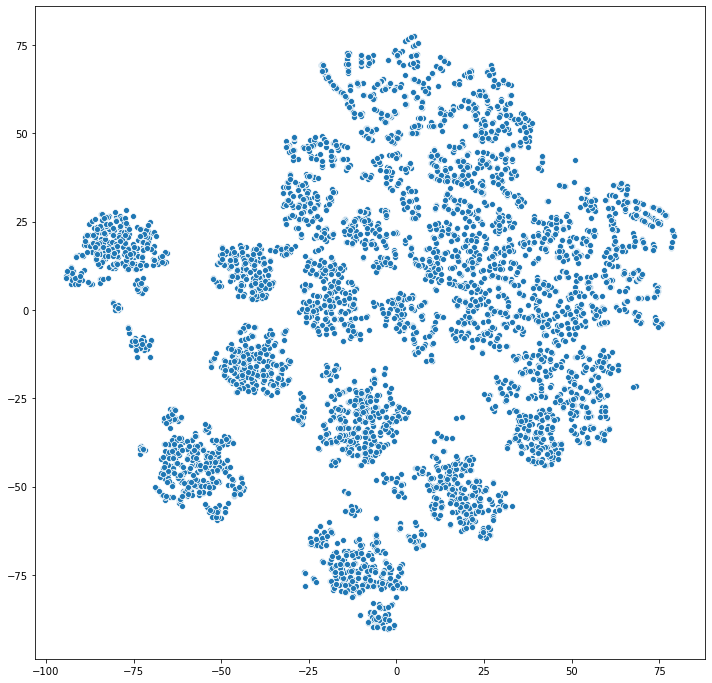

In [17]:
# Unpack and visualize the data from the tsne

tsne_1_x = []
tsne_1_y = []

#I am going to write my unpacking protocol as a function
#this way I can reuse it for additional reps

def tsne_unpack(tsne_array, list1, list2):
    for t in tsne_array:
        list1.append(t[0])
        list2.append(t[1])

tsne_unpack(ws_tsne1, tsne_1_x, tsne_1_y)

#function verified by printing tsne_1_x

#visualize the data using a scatter plot from seaborn
plt.figure(figsize = (12, 12))
sns.scatterplot(x = tsne_1_x, y = tsne_1_y)

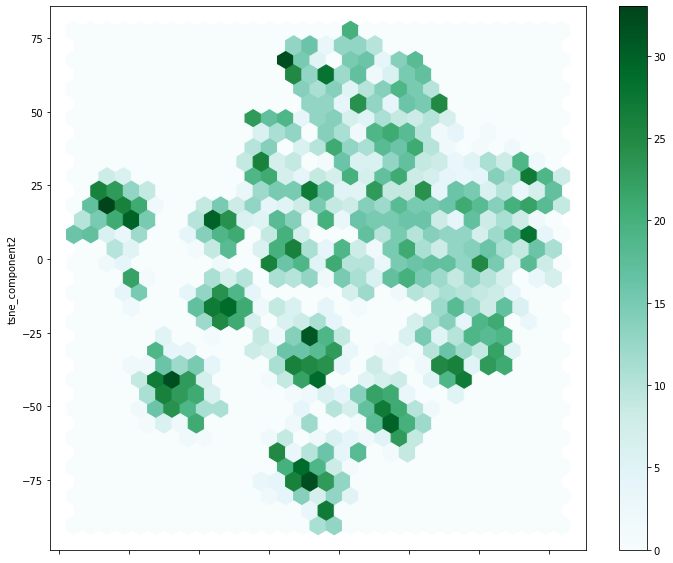

In [18]:
#try to visualize the same thing with a hexbin

tsne_1_dict = {'tsne_component1': tsne_1_x, 'tsne_component2': tsne_1_y}

tsne_vs_df = pd.DataFrame(tsne_1_dict)

tsne_vs_df.plot.hexbin(x = 'tsne_component1', y='tsne_component2', gridsize = 30, figsize = (12, 10))

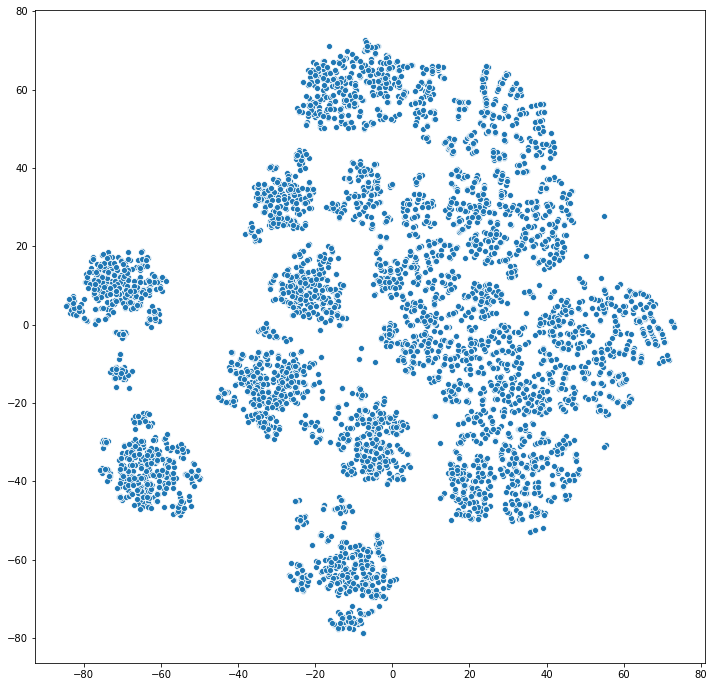

In [19]:
#write a function to aid the optimization run

def visny_tsne(tsne_instantiation):
    
    ws_tsne_iter = tsne_instantiation.fit_transform(ml_scale)
    
    tsne_x = []
    tsne_y = []
    
    tsne_unpack(ws_tsne_iter, tsne_x, tsne_y)
    
    plt.figure(figsize = (12, 12))
    sns.scatterplot(x = tsne_x, y = tsne_y)
    plt.show()
    
tsne2 = TSNE(random_state=42, perplexity = 40)

visny_tsne(tsne2)

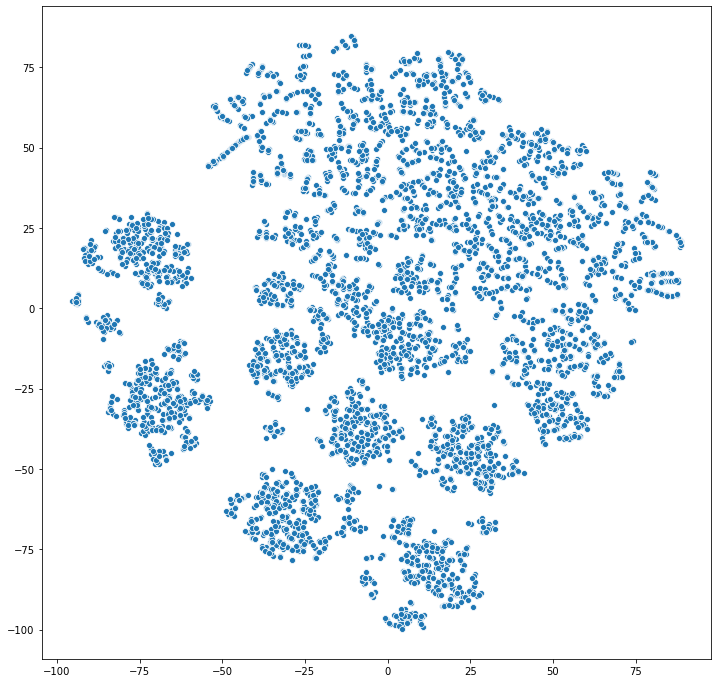

In [20]:
#I can see some clusters, but I'm not satisfied with the separation and want to tune some parameters

tsne3 = TSNE(random_state=42, perplexity = 20)

visny_tsne(tsne3)

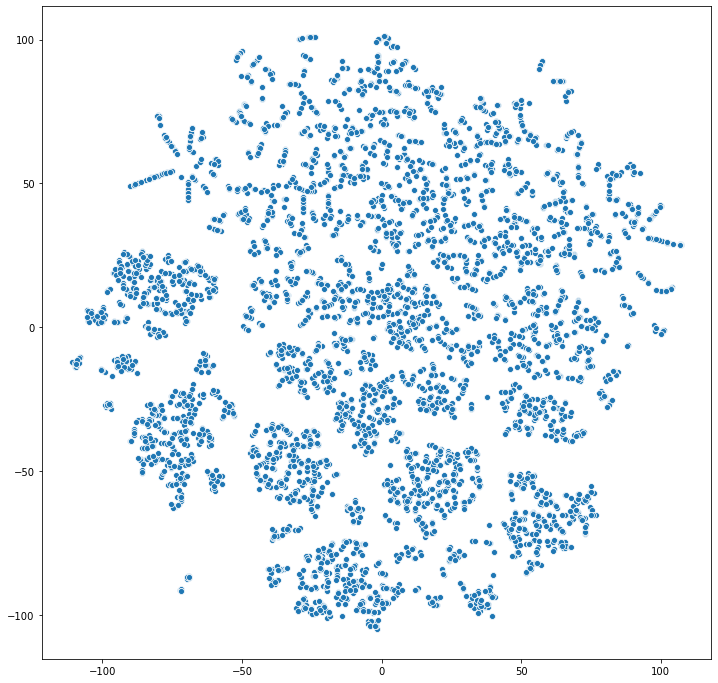

In [21]:
tsne4 = TSNE(random_state=42, perplexity = 10)

visny_tsne(tsne4)

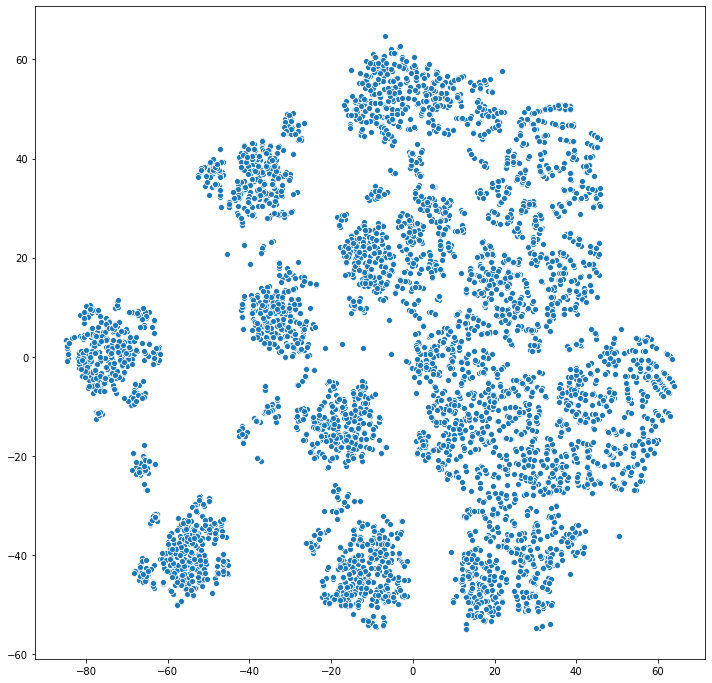

In [22]:
tsne5 = TSNE(random_state=42, perplexity = 50)

visny_tsne(tsne5)

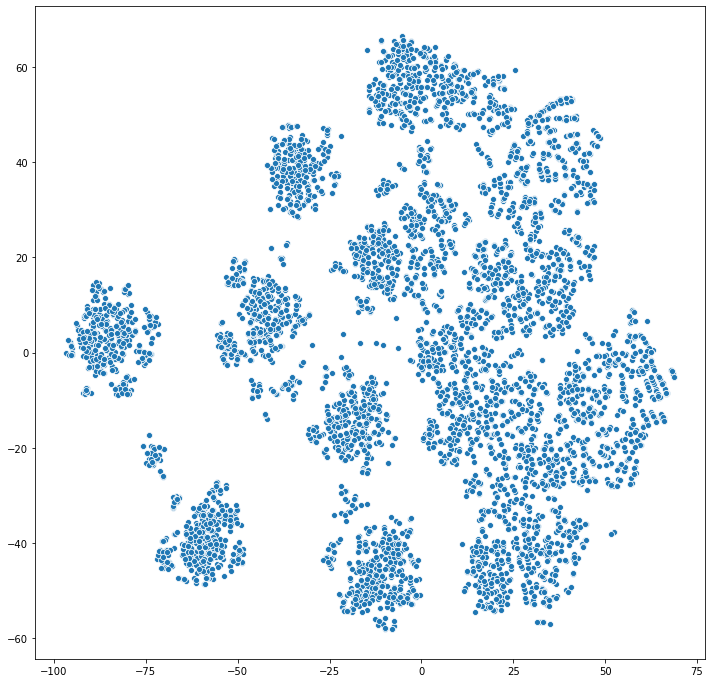

In [23]:
tsne6 = TSNE(random_state=42, perplexity = 50, learning_rate = 300)

visny_tsne(tsne6)

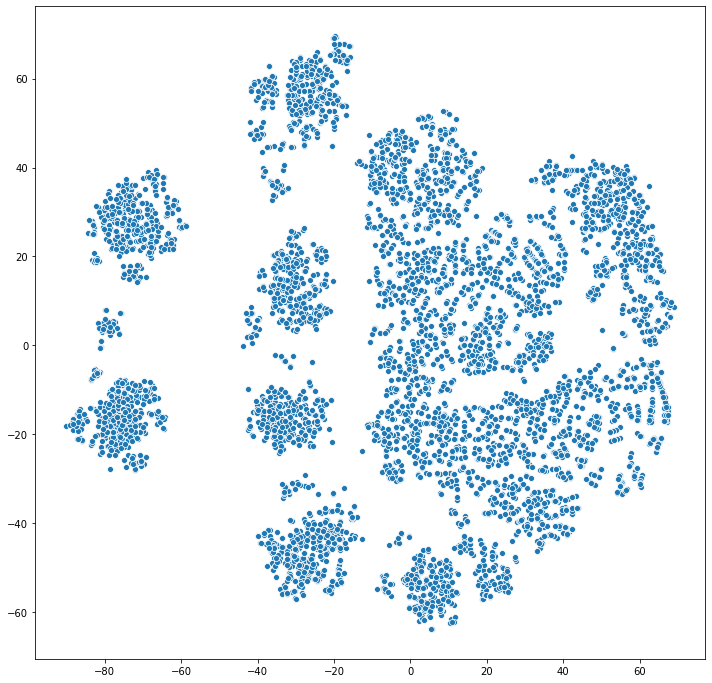

In [24]:
tsne7 = TSNE(random_state=42, perplexity = 50, learning_rate = 600)

visny_tsne(tsne7)

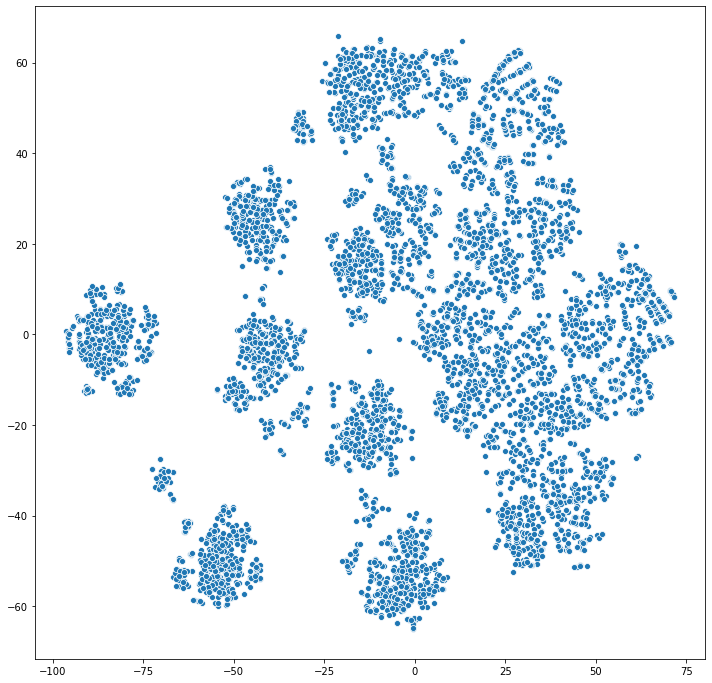

In [25]:
tsne8 = TSNE(random_state=42, perplexity = 50, learning_rate = 450)

visny_tsne(tsne8)

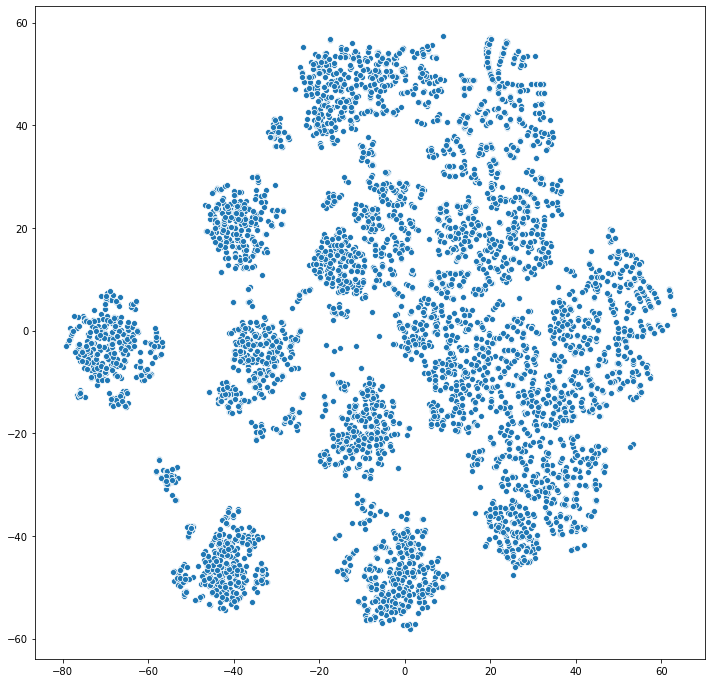

In [26]:
tsne9 = TSNE(random_state=42, perplexity = 50, learning_rate = 100)

visny_tsne(tsne9)

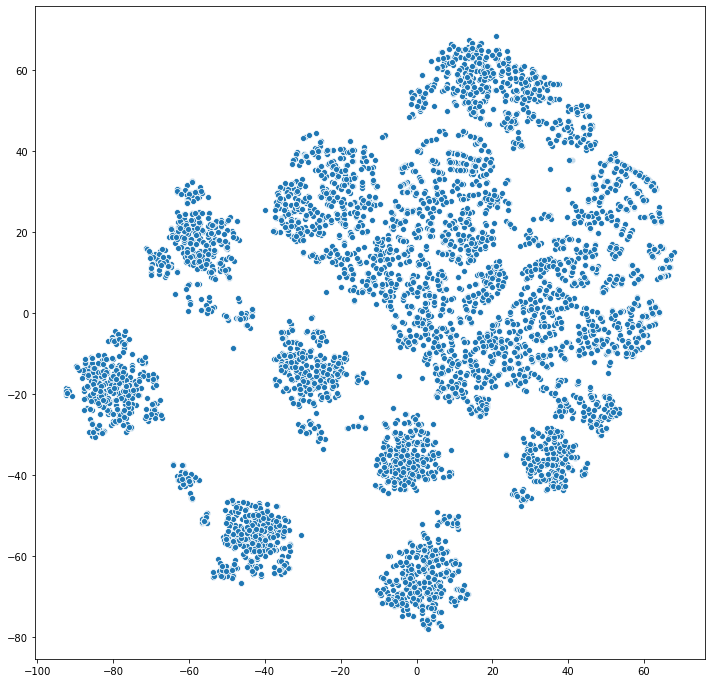

In [27]:
tsne10 = TSNE(random_state=42, perplexity = 50, learning_rate = 1000)

visny_tsne(tsne10)

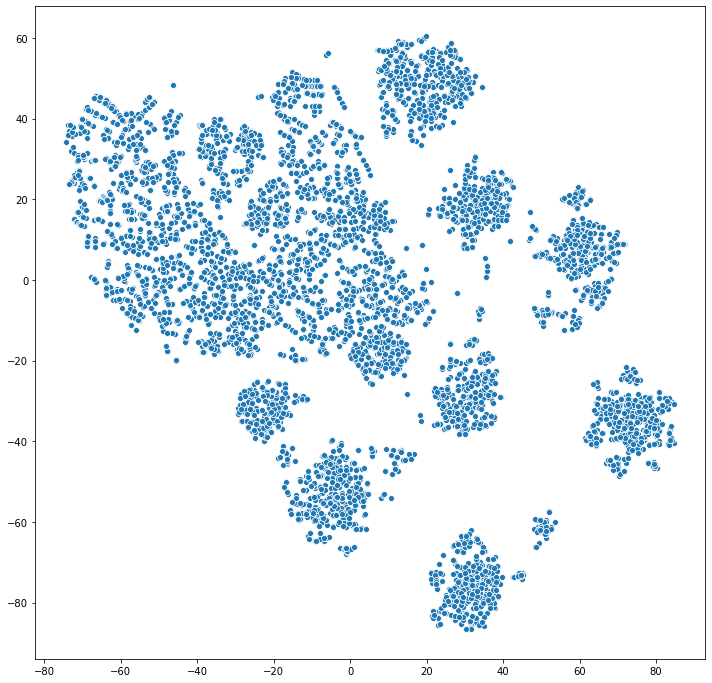

In [28]:
tsne11 = TSNE(random_state=42, perplexity = 50, learning_rate = 1000, early_exaggeration = 20)

visny_tsne(tsne11)

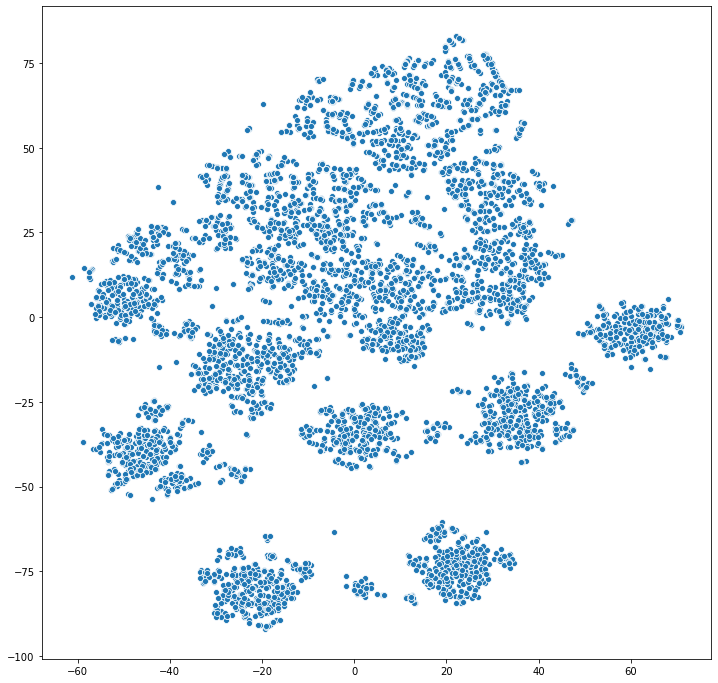

In [29]:
tsne12 = TSNE(random_state=42, perplexity = 50, learning_rate = 1000, early_exaggeration = 30)

visny_tsne(tsne12)

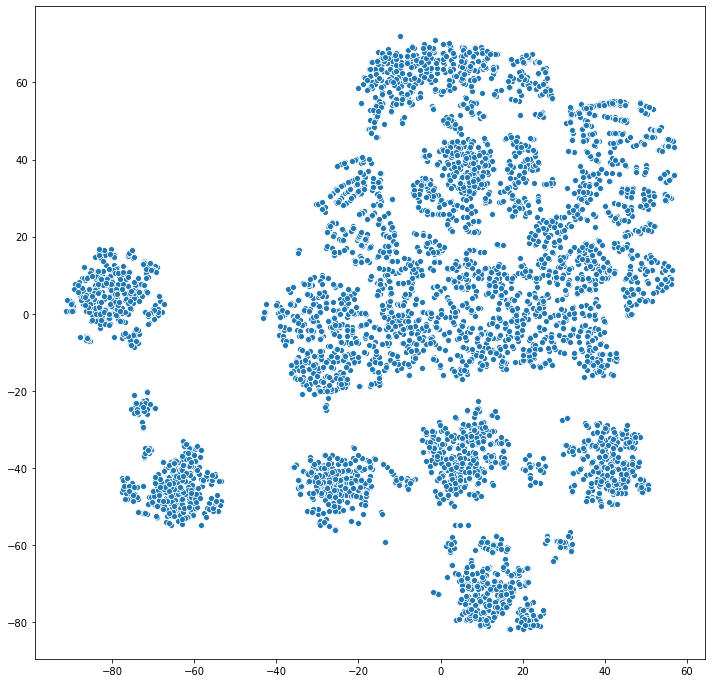

In [30]:
tsne13 = TSNE(random_state=42, perplexity = 50, learning_rate = 1000, early_exaggeration = 6)

visny_tsne(tsne13)

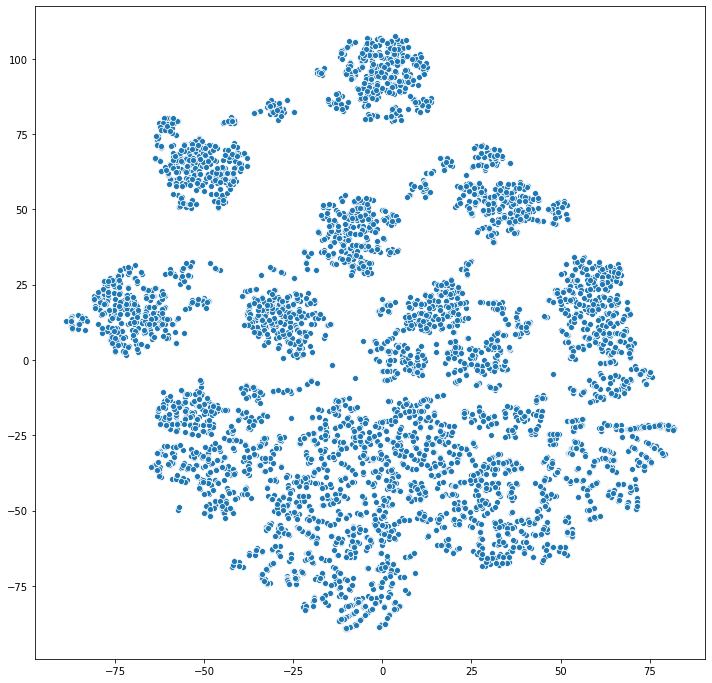

In [31]:
#try lower perplexity with a higher learning rate

tsne14 = TSNE(random_state=42, perplexity = 30, learning_rate = 1000)

visny_tsne(tsne14)

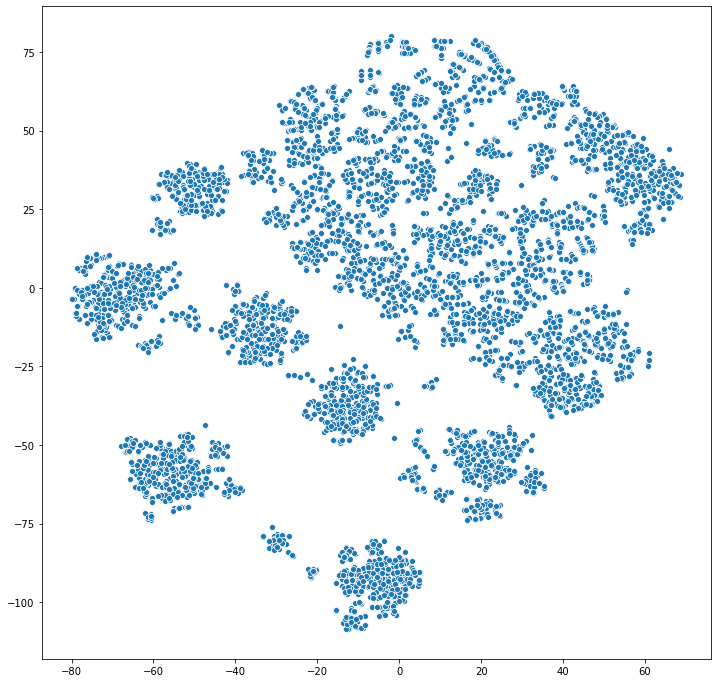

In [32]:
tsne15 = TSNE(random_state=42, perplexity = 40, learning_rate = 1000)

visny_tsne(tsne15)

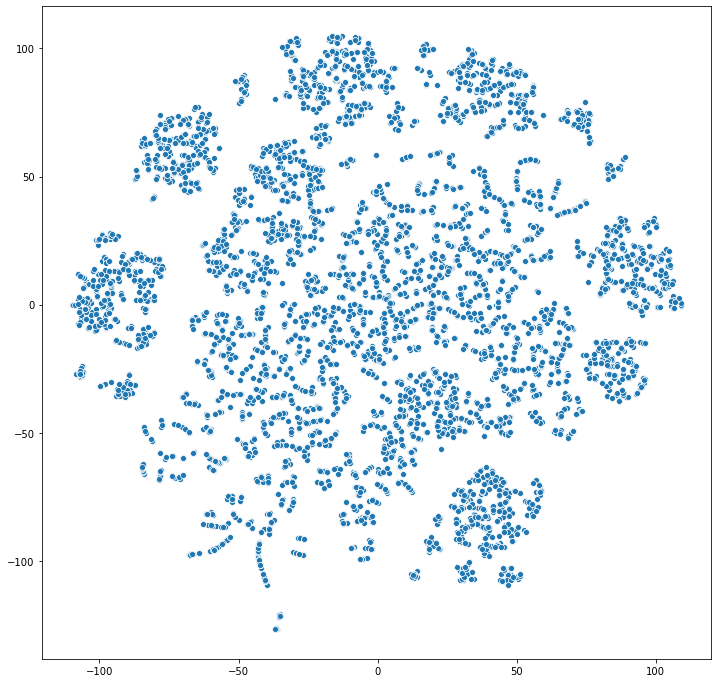

In [33]:
tsne16 = TSNE(random_state=42, perplexity = 10, learning_rate = 1000)

visny_tsne(tsne16)

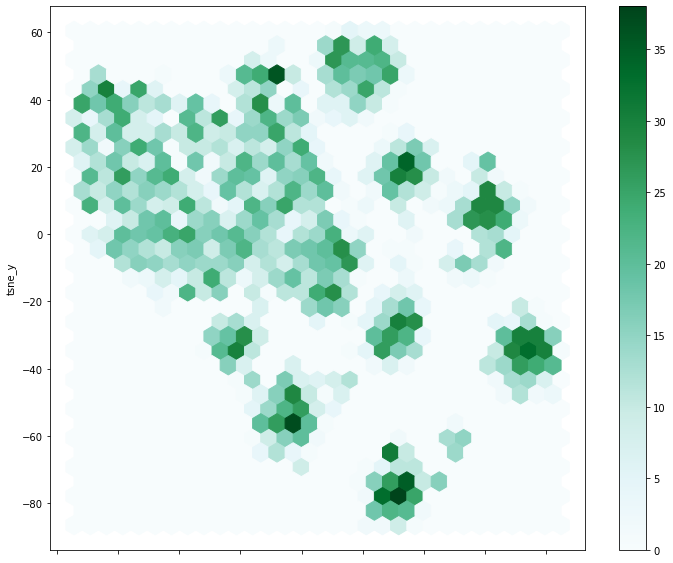

In [36]:
#t-SNE 11 looks like it obtained the best results, although it doesn't look like the data separates that well into clusters
#visualize this tsne using a hexbin plot

ws_tsne_max = tsne11.fit_transform(ml_scale)
    
tsne_x_max = []
tsne_y_max = []
    
tsne_unpack(ws_tsne_max, tsne_x_max, tsne_y_max)

tsne_max_dict = {'tsne_x': tsne_x_max, 'tsne_y': tsne_y_max}

tsne_max_df = pd.DataFrame(tsne_max_dict)

tsne_max_df.plot.hexbin(x = 'tsne_x', y='tsne_y', gridsize = 30, figsize = (12, 10))

plt.show()

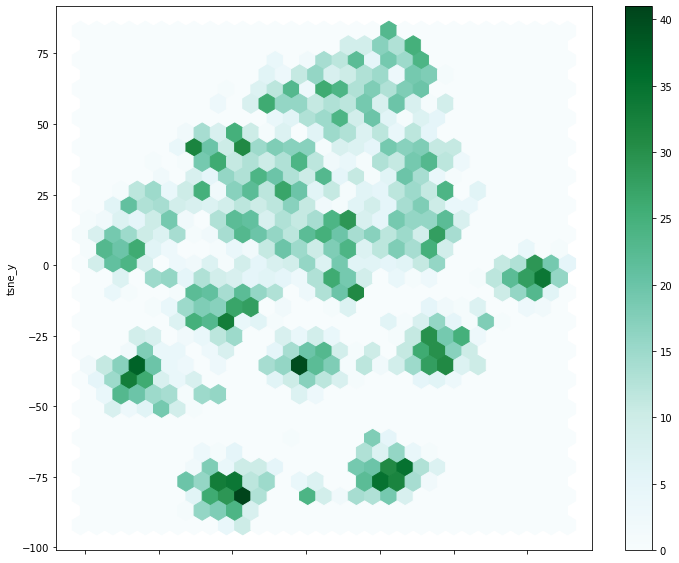

In [35]:
ws_tsne_max = tsne12.fit_transform(ml_scale)
    
tsne_x_max = []
tsne_y_max = []
    
tsne_unpack(ws_tsne_max, tsne_x_max, tsne_y_max)

tsne_max_dict = {'tsne_x': tsne_x_max, 'tsne_y': tsne_y_max}

tsne_max_df = pd.DataFrame(tsne_max_dict)

tsne_max_df.plot.hexbin(x = 'tsne_x', y='tsne_y', gridsize = 30, figsize = (12, 10))

plt.show()

I'm getting the best results out of 11 or 12 for sure. In any case, this data is clustering much better with the combined features, though. It will be interesting to see what I can do with clustering here - based on the results, it might be worth using something like kmeans as well as dbscan, since a lot of the clusters show up pretty spherical looking. 